# Face Recognition using CNN

 # Step1:
 
At the first, you should input the required libraries:

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

Using TensorFlow backend.
E:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type

# Step2:

* Load Dataset :

After loading the Dataset you have to normalize every image.

Note: an image is a Uint8 matrix of pixels and for calculation, you need to convert the format of the image to float or double

In [2]:
import numpy as np
import os.path

class IdentityMetadata():
    def __init__(self, base, name, file):
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
y_all = []    


def load_metadata(path):
    metadata = []
    people_type = 0
    num = 0
    for i in sorted(os.listdir(path)):
        for f in sorted(os.listdir(os.path.join(path, i))):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
            
            y_all.append(people_type)
            print(i,y_all[num])
            num+=1
        people_type+=1
            
    return np.array(metadata)

metadata = load_metadata('26')

cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
dpp_NewTaipei_01 1
dpp_NewTaipei_01 1
dpp_NewTaipei_01 1
dpp_NewTaipei_01 1
dpp_NewTaipei_01 1
dpp_NewTaipei_01 1
dpp_NewTaipei_01 1
dpp_NewTaipei_01 1
dpp_NewTaipei_01 1
dpp_NewTaipei_01 1
dpp_NewTaipei_01 1
dpp_NewTaipei_01 1
dpp_NewTaipei_01 1
dpp_NewTaipei_01 1
dpp_NewTaipei_01 1
dpp_NewTaipei_01 1
dpp_NewTaipei_01 1
dpp_NewTaipei_01 1
dpp_NewTaipei_01 1
dpp_NewTaipei_01 1
dpp_NewTaipei_01 1
d

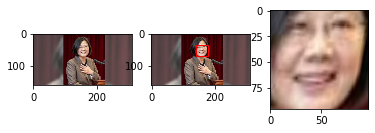

In [3]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from align import AlignDlib

%matplotlib inline

def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

# Initialize the OpenFace face alignment utility
alignment = AlignDlib('models/landmarks.dat')

# Load an image of Jacques Chirac
jc_orig = load_image(metadata[77].image_path())

# Detect face and return bounding box
bb = alignment.getLargestFaceBoundingBox(jc_orig)

# Transform image using specified face landmark indices and crop image to 96x96
jc_aligned = alignment.align(96, jc_orig, bb, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

# Show original image
plt.subplot(131)
plt.imshow(jc_orig)

# Show original image with bounding box
plt.subplot(132)
plt.imshow(jc_orig)
plt.gca().add_patch(patches.Rectangle((bb.left(), bb.top()), bb.width(), bb.height(), fill=False, color='red'))

# Show aligned image
plt.subplot(133)
plt.imshow(jc_aligned);

In [4]:
def align_image(img):
    return alignment.align(96, img, alignment.getLargestFaceBoundingBox(img), 
                           landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

embedded = np.zeros((metadata.shape[0], 128))

for i, m in enumerate(metadata):
    try:
        img = load_image(m.image_path())
        img = align_image(img)
        img = (img / 255.).astype(np.float32)
        embedded[i] = nn4_small2_pretrained.predict(np.expand_dims(img, axis=0))[0]
    # scale RGB values to interval [0,1]
    # obtain embedding vector for image
    except:
        print(m.image_path())

In [5]:
int(metadata.shape[0]/5)
(metadata.shape[0]/5+0.1)%1

0.5

In [6]:
total_test_num = int(metadata.shape[0]/5)
total_train_num = metadata.shape[0]-total_test_num
if (metadata.shape[0]/5)%1!=0:
    total_test_num = int(metadata.shape[0]/5)+1
    total_train_num = metadata.shape[0]-total_test_num+1
    
print(total_test_num)
print(total_train_num)

print(int(9/5))

220
878
1


In [12]:
total_test_num = int(metadata.shape[0]/5)
total_train_num = metadata.shape[0]-total_test_num
if (metadata.shape[0]/5)%1!=0:
    total_test_num = int(metadata.shape[0]/5)+1
    total_train_num = metadata.shape[0]-total_test_num
x_test = np.zeros((total_test_num,96,96,3))
x_train = np.zeros((total_train_num,96,96,3))


test_num=0
train_num=0
y_test = []
y_train = []

for i, m in enumerate(metadata):
    img = load_image(m.image_path())
    img = align_image(img)
    img = (img / 255.).astype(np.float32)
    if i%5<1:
        x_test[test_num] =(np.expand_dims(img, axis=0))[0]
        y_test.append(y_all[i])
        test_num+=1
    else:
        x_train[train_num] =(np.expand_dims(img, axis=0))[0]
        y_train.append(y_all[i])
        train_num+=1

    # scale RGB values to interval [0,1]
    # obtain embedding vector for image
    print(i,m)


0 26\cyw\cyw_0001.jpg
1 26\cyw\cyw_0002.jpg
2 26\cyw\cyw_0003.jpg
3 26\cyw\cyw_0004.jpg
4 26\cyw\cyw_0005.jpg
5 26\cyw\cyw_0006.jpg
6 26\cyw\cyw_0007.jpg
7 26\cyw\cyw_0008.jpg
8 26\cyw\cyw_0009.jpg
9 26\cyw\cyw_0010.jpg
10 26\cyw\cyw_0011.jpg
11 26\cyw\cyw_0012.jpg
12 26\cyw\cyw_0013.jpg
13 26\cyw\cyw_0014.jpg
14 26\cyw\cyw_0015.jpg
15 26\cyw\cyw_0016.jpg
16 26\cyw\cyw_0017.jpg
17 26\cyw\cyw_0018.jpg
18 26\cyw\cyw_0019.jpg
19 26\cyw\cyw_0020.jpg
20 26\cyw\cyw_0021.jpg
21 26\cyw\cyw_0022.jpg
22 26\cyw\cyw_0023.jpg
23 26\cyw\cyw_0024.jpg
24 26\cyw\cyw_0025.jpg
25 26\cyw\cyw_0026.jpg
26 26\cyw\cyw_0027.jpg
27 26\cyw\cyw_0028.jpg
28 26\cyw\cyw_0029.jpg
29 26\cyw\cyw_0030.jpg
30 26\cyw\cyw_0031.jpg
31 26\cyw\cyw_0032.jpg
32 26\cyw\cyw_0033.jpg
33 26\cyw\cyw_0034.jpg
34 26\cyw\cyw_0035.jpg
35 26\cyw\cyw_0036.jpg
36 26\cyw\cyw_0037.jpg
37 26\cyw\cyw_0038.jpg
38 26\cyw\cyw_0039.jpg
39 26\cyw\cyw_0040.jpg
40 26\cyw\cyw_0041.jpg
41 26\cyw\cyw_0042.jpg
42 26\cyw\cyw_0043.jpg
43 26\cyw\cyw_0044.jp

266 26\dpp_NewTaipei_07\3010009.jpg
267 26\dpp_NewTaipei_07\3010010.jpg
268 26\dpp_NewTaipei_07\3010012.jpg
269 26\dpp_NewTaipei_07\3010014.jpg
270 26\dpp_NewTaipei_07\3010016.jpg
271 26\dpp_NewTaipei_07\3010024.jpg
272 26\dpp_NewTaipei_07\3010029.jpg
273 26\dpp_NewTaipei_07\3010032.jpg
274 26\dpp_NewTaipei_07\3010033.jpg
275 26\dpp_NewTaipei_07\3010036.jpg
276 26\dpp_NewTaipei_07\3010037.jpg
277 26\dpp_NewTaipei_07\3010039.jpg
278 26\dpp_NewTaipei_07\3010041.jpg
279 26\dpp_NewTaipei_07\3010045.jpg
280 26\dpp_NewTaipei_07\3010046.jpg
281 26\dpp_NewTaipei_07\3010050.jpg
282 26\dpp_NewTaipei_07\3010051.jpg
283 26\dpp_NewTaipei_07\3010057.jpg
284 26\dpp_NewTaipei_07\3010061.jpg
285 26\dpp_NewTaipei_07\3010079.jpg
286 26\dpp_NewTaipei_08\3210004.jpg
287 26\dpp_NewTaipei_08\3210007.jpg
288 26\dpp_NewTaipei_08\3210008.jpg
289 26\dpp_NewTaipei_08\3210009.jpg
290 26\dpp_NewTaipei_08\3210010.jpg
291 26\dpp_NewTaipei_08\3210011.jpg
292 26\dpp_NewTaipei_08\3210012.jpg
293 26\dpp_NewTaipei_08\3210

529 26\kmt_taipei_02\310004.jpg
530 26\kmt_taipei_02\310005.jpg
531 26\kmt_taipei_02\310006.jpg
532 26\kmt_taipei_02\310007.jpg
533 26\kmt_taipei_02\310009.jpg
534 26\kmt_taipei_02\310011.jpg
535 26\kmt_taipei_02\310012.jpeg
536 26\kmt_taipei_02\310014.jpg
537 26\kmt_taipei_02\310015.jpg
538 26\kmt_taipei_02\310018.jpg
539 26\kmt_taipei_02\310020.jpg
540 26\kmt_taipei_02\310024.jpg
541 26\kmt_taipei_02\310031.jpg
542 26\kmt_taipei_02\310032.jpg
543 26\kmt_taipei_02\310034.jpg
544 26\kmt_taipei_02\310042.jpg
545 26\kmt_taipei_02\310053.jpeg
546 26\kmt_taipei_02\310056.jpg
547 26\kmt_taipei_02\310063.jpg
548 26\kmt_taipei_03\510002.jpg
549 26\kmt_taipei_03\510004.jpg
550 26\kmt_taipei_03\510007.jpg
551 26\kmt_taipei_03\510008.jpg
552 26\kmt_taipei_03\510010.jpg
553 26\kmt_taipei_03\510013.jpg
554 26\kmt_taipei_03\510014.jpg
555 26\kmt_taipei_03\510016.jpg
556 26\kmt_taipei_03\510019.jpg
557 26\kmt_taipei_03\510020.jpg
558 26\kmt_taipei_03\510026.jpg
559 26\kmt_taipei_03\510027.jpeg
560 2

800 26\lqd\lqd_0071.jpg
801 26\lqd\lqd_0072.jpg
802 26\lqd\lqd_0073.jpg
803 26\lqd\lqd_0075.jpg
804 26\lqd\lqd_0076.jpg
805 26\lqd\lqd_0077.jpg
806 26\lqd\lqd_0078.jpg
807 26\lqd\lqd_0079.jpg
808 26\lqd\lqd_0080.jpg
809 26\lqd\lqd_0081.jpg
810 26\lqd\lqd_0082.jpg
811 26\lqd\lqd_0083.jpg
812 26\lqd\lqd_0085.jpg
813 26\lqd\lqd_0086.jpg
814 26\lqd\lqd_0088.jpg
815 26\lqd\lqd_0089.jpg
816 26\lqd\lqd_0090.jpg
817 26\lqd\lqd_0091.jpg
818 26\lqd\lqd_0092.jpg
819 26\lqd\lqd_0093.jpg
820 26\lqd\lqd_0094.jpg
821 26\lqd\lqd_0095.jpg
822 26\lqd\lqd_0096.jpg
823 26\lqd\lqd_0097.jpg
824 26\lqd\lqd_0098.jpg
825 26\lqd\lqd_0100.jpg
826 26\scy\scy_0001.jpg
827 26\scy\scy_0002.jpg
828 26\scy\scy_0003.jpg
829 26\scy\scy_0004.jpg
830 26\scy\scy_0005.jpg
831 26\scy\scy_0006.jpg
832 26\scy\scy_0007.jpg
833 26\scy\scy_0008.jpg
834 26\scy\scy_0009.jpg
835 26\scy\scy_0010.jpg
836 26\scy\scy_0011.jpg
837 26\scy\scy_0012.jpg
838 26\scy\scy_0013.jpg
839 26\scy\scy_0015.jpg
840 26\scy\scy_0016.jpg
841 26\scy\scy_0

In [8]:
y_test = np.array(y_test)
y_train = np.array(y_train)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(x_train)

print(y_train.shape)
print(y_test.shape)

(878, 96, 96, 3)
(220, 96, 96, 3)
[[[[0.08235294 0.05098039 0.01568628]
   [0.09411765 0.0627451  0.01568628]
   [0.10980392 0.07058824 0.01568628]
   ...
   [0.76862746 0.4627451  0.30980393]
   [0.72549021 0.42352942 0.27450982]
   [0.67843139 0.3882353  0.26274511]]

  [[0.08627451 0.05490196 0.02352941]
   [0.10196079 0.06666667 0.03137255]
   [0.11764706 0.08235294 0.03529412]
   ...
   [0.78431374 0.48235294 0.32941177]
   [0.74509805 0.43921569 0.29019609]
   [0.69803923 0.40392157 0.27058825]]

  [[0.12941177 0.08235294 0.0627451 ]
   [0.13725491 0.09411765 0.0627451 ]
   [0.14509805 0.10196079 0.06666667]
   ...
   [0.80784315 0.50588238 0.35294119]
   [0.76862746 0.4627451  0.3137255 ]
   [0.72156864 0.42352942 0.28235295]]

  ...

  [[0.92156863 0.42352942 0.01176471]
   [0.93333334 0.42352942 0.00784314]
   [0.94117647 0.42352942 0.00784314]
   ...
   [0.94117647 0.66666669 0.52549022]
   [0.92941177 0.65490198 0.51764709]
   [0.9254902  0.64313728 0.50196081]]

  [[0.91372

# Step 3

Split DataSet : Validation data and Train 

Validation DataSet: this data set is used to minimize overfitting.If the accuracy over the training data set increases, but the accuracy over then validation data set stays the same or decreases, then you're overfitting your neural network and you should stop training.

 * Note: we usually use 30 percent of every dataset as the validation data but Here we only used 5 percent because the number of images in this dataset is very low. 



In [10]:
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.2, random_state=1234,)

ValueError: Found input variables with inconsistent numbers of samples: [878, 877]

# Step 4

for using the CNN, we need to change The size of images ( The size of images must be the same)

In [ ]:
im_rows=96
im_cols=96
batch_size=512
im_shape=(im_rows, im_cols, 3)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)
print(y_test)
print(y_train[0:100])

# Step 5


Build CNN model:
 CNN have 3 main layer: 
 * 1-Convolotional layer 
 * 2- pooling layer  
 * 3- fully connected layer
 
 we could build a new architecture of CNN by changing the number and position of layers.
 

In [ ]:

#filters= the depth of output image or kernels

cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=(7,7), activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=54, kernel_size=(5,5), activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dropout(0.25),
    #20 is the number of outputs
    Dense(20, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

Show the model's parameters.

In [ ]:
cnn_model.summary()

# Step 6

Train the Model

* Note: You can change the number of epochs


In [ ]:
print(x_valid.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=100, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Evaluate the test data


In [ ]:
scor = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

# Step 7 

plot the result

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# step 8

Plot Confusion Matrix

In [ ]:
predicted =np.array( cnn_model.predict(x_test))
#print(predicted)
#print(y_test)
ynew = cnn_model.predict_classes(x_test)


Acc=accuracy_score(y_test, ynew)
print("accuracy : ")
print(Acc)
#/tn, fp, fn, tp = confusion_matrix(np.array(y_test), ynew).ravel()
cnf_matrix=confusion_matrix(np.array(y_test), ynew)

y_test1 = np_utils.to_categorical(y_test, 20)



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


print('Confusion matrix, without normalization')
print(cnf_matrix)

plt.figure()
plot_confusion_matrix(cnf_matrix[1:10,1:10], classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix[11:20,11:20], classes=[10,11,12,13,14,15,16,17,18,19],
                      title='Confusion matrix, without normalization')

plt.figure(figsize=(9,9))
plot_confusion_matrix(cnf_matrix[1:20,1:20], classes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],
                      title='Confusion matrix, without normalization')
print("Confusion matrix:\n%s" % confusion_matrix(np.array(y_test), ynew))
print(classification_report(np.array(y_test), ynew))